In [53]:
pip install xgboost

     |████████████████████████████████| 1.7 MB 2.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [160]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import model_selection, metrics
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.linear_model import LogisticRegression, SGDClassifier, Ridge
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

import xgboost as xgb
from xgboost import XGBClassifier

In [4]:
df0 = pd.read_csv("heart.csv")

## Features in the Dataset

<b>Age:</b> age of the patient [years]

<b>Sex:</b> sex of the patient [M: Male, F: Female]

<b>ChestPainType:</b> chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

<b>RestingBP:</b> resting blood pressure [mm Hg]

<b>Cholesterol:</b> serum cholesterol [mm/dl]

<b>FastingBS:</b> fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

<b>RestingECG:</b> resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

<b>MaxHR:</b> maximum heart rate achieved [Numeric value between 60 and 202]

<b>ExerciseAngina:</b> exercise-induced angina [Y: Yes, N: No]

<b>Oldpeak:</b> oldpeak = ST [Numeric value measured in depression]

<b>ST_Slope:</b> the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

<b>HeartDisease:</b> output class [1: heart disease, 0: Normal]

# Exploratory Data Analysis (EDA) & Visualizaiton

## Looking at the dataframe

In [5]:
df1 = df0.copy()
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df1.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [7]:
df1.shape

(918, 12)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
df1.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
df1.describe(include=object)

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [11]:
df1.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [12]:
df1.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [13]:
df1.duplicated().sum()

0

## Target Variable

In [14]:
df1['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [15]:
print('Percentage of heart disease:')
(df1['HeartDisease'].value_counts())/(df1['HeartDisease'].value_counts().sum())*100

Percentage of heart disease:


1    55.337691
0    44.662309
Name: HeartDisease, dtype: float64

In [16]:
df1['HeartDisease'].isnull().sum()

0

## Numerical and Categotical Features

In [17]:
df1.select_dtypes('number').columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

In [18]:
numerical= df1.drop(['HeartDisease'],axis=1).select_dtypes('number').columns
numerical

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')

In [19]:
categorical = df1.select_dtypes('object').columns
categorical

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

## Numerical Features

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>],
       [<AxesSubplot:title={'center':'Cholesterol'}>,
        <AxesSubplot:title={'center':'FastingBS'}>],
       [<AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>]], dtype=object)

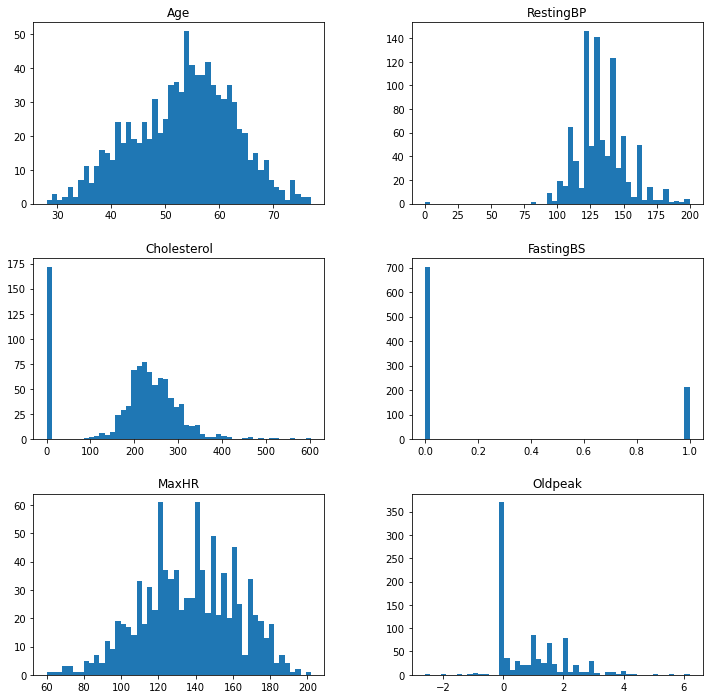

In [20]:
df1[numerical].hist(grid=False, figsize=(12,12), bins=50)

In [21]:
print('Zero values in Cholesterol:')
print()
print((df1['Cholesterol'] == 0).value_counts())

Zero values in Cholesterol:

False    746
True     172
Name: Cholesterol, dtype: int64


In [22]:
skew_values = df1.skew().sort_values(ascending=False)
skew_values

/var/folders/6x/5zjv7vks3nz9sbj72zcrb7sw0000gn/T/ipykernel_37217/3092440643.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skew_values = df1.skew().sort_values(ascending=False)


FastingBS       1.264484
Oldpeak         1.022872
RestingBP       0.179839
MaxHR          -0.144359
Age            -0.195933
HeartDisease   -0.215086
Cholesterol    -0.610086
dtype: float64

In [23]:
kurtosis_values = df1.kurtosis().sort_values(ascending=False)
kurtosis_values

/var/folders/6x/5zjv7vks3nz9sbj72zcrb7sw0000gn/T/ipykernel_37217/3922920630.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kurtosis_values = df1.kurtosis().sort_values(ascending=False)


RestingBP       3.271251
Oldpeak         1.203064
Cholesterol     0.118208
Age            -0.386140
FastingBS      -0.401960
MaxHR          -0.448248
HeartDisease   -1.958008
dtype: float64

### We will transform 'Cholesterol' using log transformation

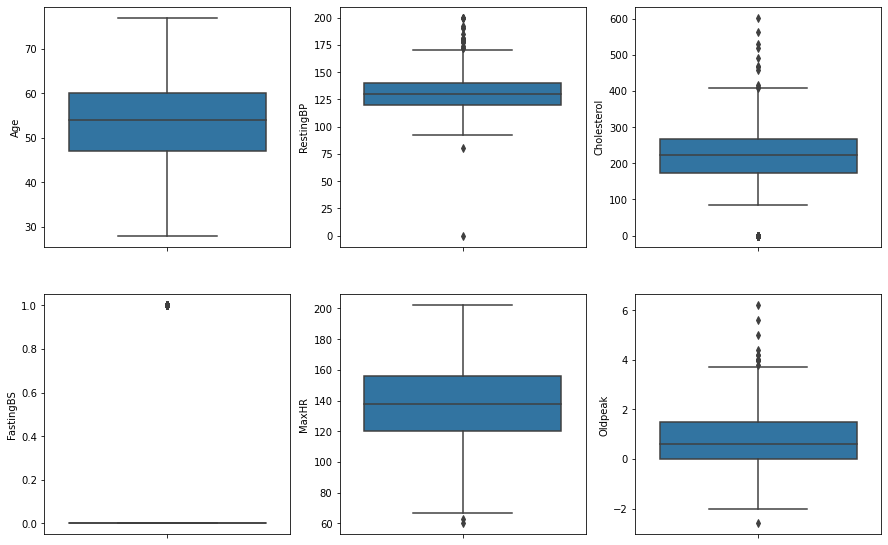

In [24]:
index = 0
plt.figure(figsize=(15,15))
for feature in numerical:
    index += 1
    plt.subplot(3,3,index)
    sns.boxplot(y=feature,data=df1)

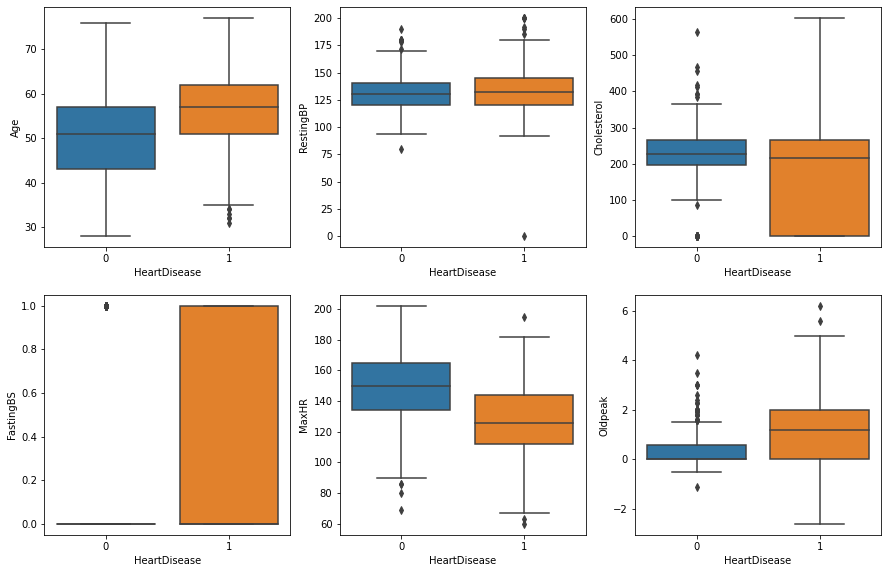

In [25]:
index = 0
plt.figure(figsize=(15,15))
for feature in numerical:
    index += 1
    plt.subplot(3,3,index)
    sns.boxplot(x='HeartDisease',y=feature,data=df1)

In [26]:
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


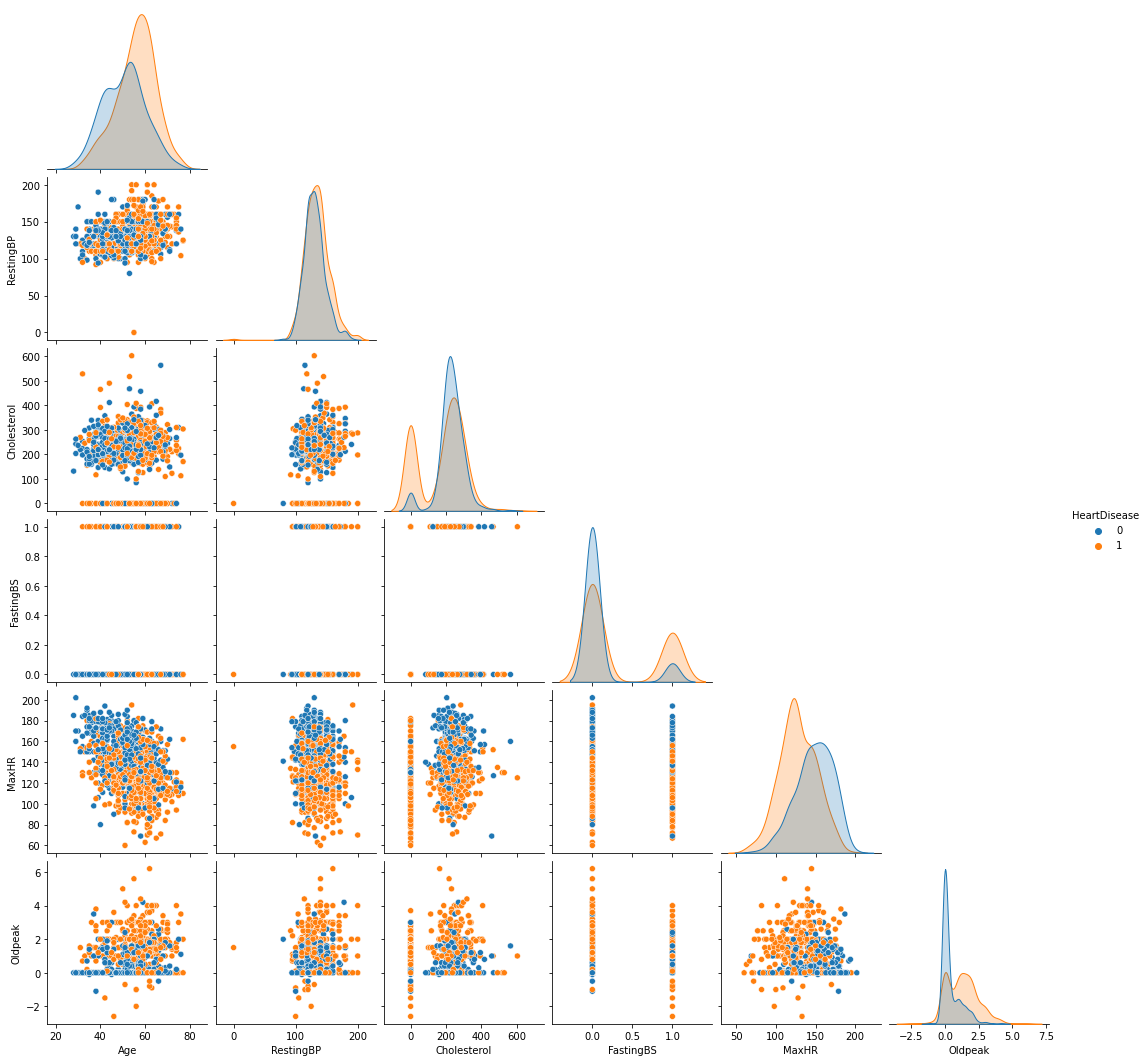

In [27]:
sns.pairplot(df1,hue="HeartDisease",corner=True)

<AxesSubplot:>

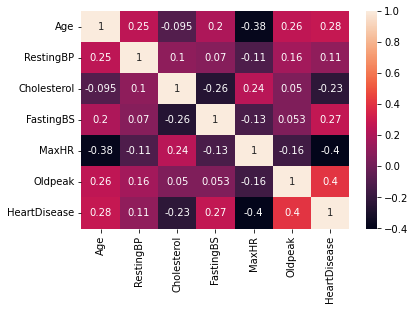

In [28]:
sns.heatmap(df1.corr(),annot=True)

## Categorical Features

In [29]:
df1[categorical].head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [30]:
df1[categorical].describe()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


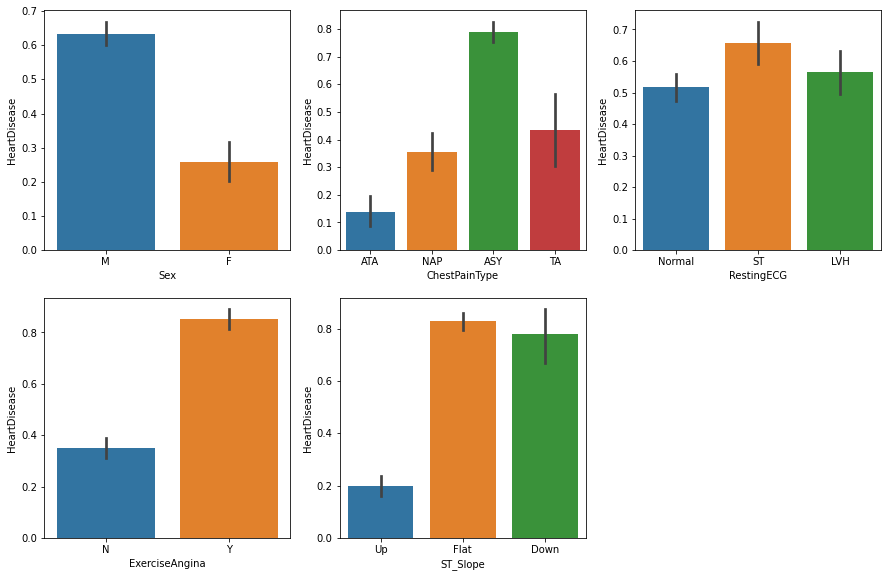

In [31]:
index = 0
plt.figure(figsize=(15,15))
for feature in categorical:
    index += 1
    plt.subplot(3,3,index)
    sns.barplot(x=feature,y='HeartDisease',data=df1)

In [32]:
for i in categorical:
    print(df1[i].value_counts())

M    725
F    193
Name: Sex, dtype: int64
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
N    547
Y    371
Name: ExerciseAngina, dtype: int64
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


/Users/naman_bhatt/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 29.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


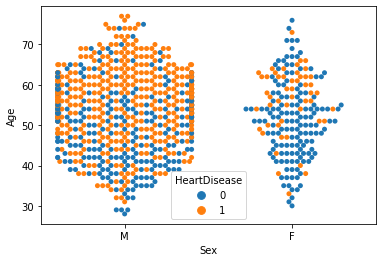

In [34]:
sns.swarmplot(y="Age", x="Sex", hue="HeartDisease", data=df1);

/Users/naman_bhatt/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/naman_bhatt/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 44.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


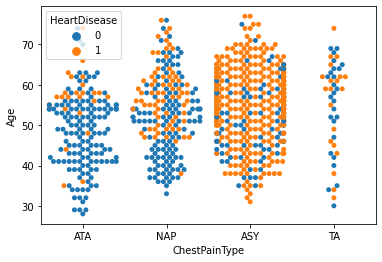

In [36]:
sns.swarmplot(y="Age", x="ChestPainType", hue="HeartDisease", data=df1);

/Users/naman_bhatt/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 33.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


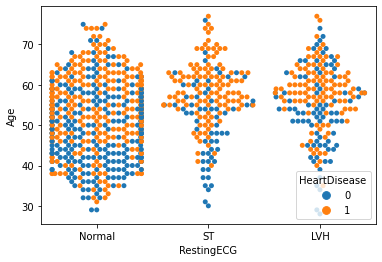

In [37]:
sns.swarmplot(y="Age", x="RestingECG", hue="HeartDisease", data=df1);

/Users/naman_bhatt/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/naman_bhatt/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


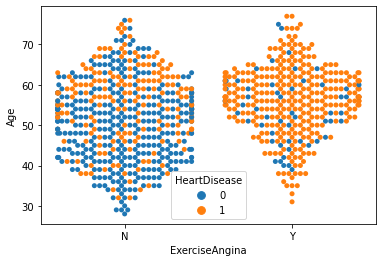

In [38]:
sns.swarmplot(y="Age", x="ExerciseAngina", hue="HeartDisease", data=df1);

/Users/naman_bhatt/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 16.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/naman_bhatt/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


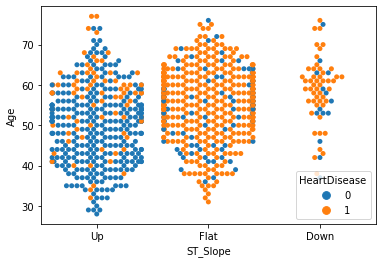

In [39]:
sns.swarmplot(y="Age", x="ST_Slope", hue="HeartDisease", data=df1);

## Dummy Variables

In [40]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [41]:
df2 = pd.get_dummies(df1)
df2

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [70]:
df3 = df2.copy()
df3.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
5,39,120,339,0,170,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
6,45,130,237,0,170,0.0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
7,54,110,208,0,142,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
8,37,140,207,0,130,1.5,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
9,48,120,284,0,120,0.0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1


In [74]:
df4 = df3.drop(['HeartDisease'], axis=1)

In [75]:
df4.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


### Feature Scaling

### DO NOT scale y_train !!! Classifier algos will not work.

In [76]:
scaler = StandardScaler()
scaler.fit(df4)

df4 = pd.DataFrame(scaler.transform(df4), index=df4.index, columns = df4.columns)

In [77]:
df4

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,-0.515952,0.515952,-1.084138,2.075177,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1.938163,-1.938163,-1.084138,-0.481887,1.876744,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,-0.515952,0.515952,-1.084138,2.075177,-0.532838,-0.229679,-0.507478,-1.228087,2.038947,0.823556,-0.823556,-0.271448,-1.002181,1.150674
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1.938163,-1.938163,0.922392,-0.481887,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,-1.214246,1.214246,-0.271448,0.997824,-0.869056
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,-0.515952,0.515952,-1.084138,-0.481887,1.876744,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.551341,-0.188999,0.293283,-0.515952,0.515952,-1.084138,-0.481887,-0.532838,4.353909,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056
914,1.536902,0.627078,-0.053049,1.813758,0.164684,2.357094,-0.515952,0.515952,0.922392,-0.481887,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056
915,0.370100,-0.129513,-0.620168,-0.551341,-0.857069,0.293283,-0.515952,0.515952,0.922392,-0.481887,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,-1.214246,1.214246,-0.271448,0.997824,-0.869056
916,0.370100,-0.129513,0.340275,-0.551341,1.461525,-0.832432,1.938163,-1.938163,-1.084138,2.075177,-0.532838,-0.229679,1.970528,-1.228087,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056


## Splitting the Data into Train and Test

In [78]:
x = df4
y = df3["HeartDisease"]

In [82]:
x.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,-0.515952,0.515952,-1.084138,2.075177,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1.938163,-1.938163,-1.084138,-0.481887,1.876744,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,-0.515952,0.515952,-1.084138,2.075177,-0.532838,-0.229679,-0.507478,-1.228087,2.038947,0.823556,-0.823556,-0.271448,-1.002181,1.150674
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1.938163,-1.938163,0.922392,-0.481887,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,-1.214246,1.214246,-0.271448,0.997824,-0.869056
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,-0.515952,0.515952,-1.084138,-0.481887,1.876744,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674


In [83]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.15)

In [80]:
print('x_train size is:', x_train.shape)
print('x_test size is:', x_test.shape)
print('y_train size is:', y_train.shape)
print('y_test size is:', y_test.shape)

x_train size is: (780, 20)
x_test size is: (138, 20)
y_train size is: (780,)
y_test size is: (138,)


In [81]:
x_train.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

# Model Selection

### Creating a function to run ML algorithms

In [123]:
def run_ml_algo(algo, x_train, y_train, cv):
    
    # no CV
    model = algo.fit(x_train, y_train)
    accu = round(model.score(x_train, y_train) * 100, 2)
    
    # with 10-fold CV
    prediction = model_selection.cross_val_predict(algo, x_train, y_train, cv=cv, n_jobs = -1)
    
    # CV accuracy metrix
    accu_cv = round(metrics.accuracy_score(y_train, prediction) * 100, 2)
    
    f1        = f1_score(y_train, prediction)
    precision = precision_score(y_train, prediction)
    recall    = recall_score(y_train, prediction)
    plot_confusion_matrix(algo, x_train, y_train)
    plt.show()
    
    return accu, prediction, accu_cv, f1, precision, recall

## Try all models for practice

### Logistic Regression (default penalty is Ridge (L2))

/Users/naman_bhatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


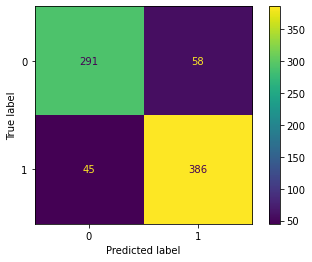

Accuracy without cross-validation: 86.79
Accuracy with 10-fold cross-validation: 85.51
F score: 0.870561282932417
Precision: 0.8597285067873304
Recall: 0.8816705336426914


In [146]:
accu_log, prediction_log, accu_cv_log, f1_log, precision_log, recall_log = run_ml_algo(LogisticRegression(), x_train, y_train, 10)

print("Accuracy without cross-validation: %s"  % accu_log)
print("Accuracy with 10-fold cross-validation: %s" % accu_cv_log)
print("F score: %s" % f1_log)
print("Precision: %s" % precision_log)
print("Recall: %s" % recall_log)

### Stochastic Gradient Descnet

/Users/naman_bhatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


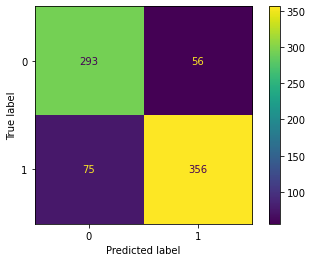

Accuracy without cross-validation: 83.21
Accuracy with 10-fold cross-validation: 82.05
F score: 0.8401826484018265
Precision: 0.8269662921348314
Recall: 0.8538283062645011


In [147]:
accu_sgd, prediction_sgd, accu_cv_sgd, f1_sgd, precision_sgd, recall_sgd = run_ml_algo(SGDClassifier(), x_train, y_train, 10)

print("Accuracy without cross-validation: %s"  % accu_sgd)
print("Accuracy with 10-fold cross-validation: %s" % accu_cv_sgd)
print("F score: %s" % f1_sgd)
print("Precision: %s" % precision_sgd)
print("Recall: %s" % recall_sgd)

### Gaussian Naive Bayes

/Users/naman_bhatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


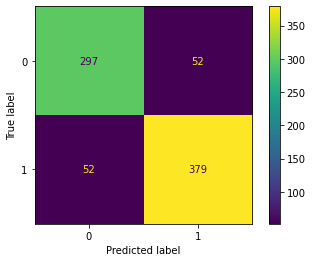

Accuracy without cross-validation: 86.67
Accuracy with 10-fold cross-validation: 86.03
F score: 0.8731082654249127
Precision: 0.8761682242990654
Recall: 0.8700696055684455


In [148]:
accu_nb, prediction_nb, accu_cv_nb, f1_nb, precision_nb, recall_nb = run_ml_algo(GaussianNB(), x_train, y_train, 10)

print("Accuracy without cross-validation: %s"  % accu_nb)
print("Accuracy with 10-fold cross-validation: %s" % accu_cv_nb)
print("F score: %s" % f1_nb)
print("Precision: %s" % precision_nb)
print("Recall: %s" % recall_nb)

### Support Vector Classifier (SVC)

/Users/naman_bhatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


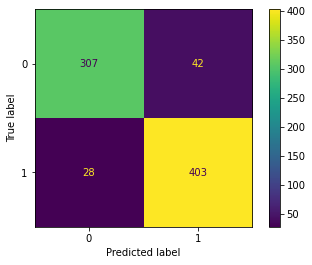

Accuracy without cross-validation: 91.03
Accuracy with 10-fold cross-validation: 87.05
F score: 0.8856172140430351
Precision: 0.8650442477876106
Recall: 0.9071925754060325


In [149]:
accu_svc, prediction_svc, accu_cv_svc, f1_svc, precision_svc, recall_svc = run_ml_algo(SVC(), x_train, y_train, 10)

print("Accuracy without cross-validation: %s"  % accu_svc)
print("Accuracy with 10-fold cross-validation: %s" % accu_cv_svc)
print("F score: %s" % f1_svc)
print("Precision: %s" % precision_svc)
print("Recall: %s" % recall_svc)

### K-Nearest Neighbours (KNN)

/Users/naman_bhatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


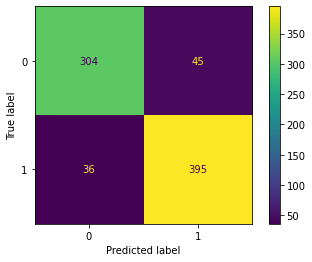

Accuracy without cross-validation: 89.62
Accuracy with 10-fold cross-validation: 87.05
F score: 0.8837744533947065
Precision: 0.8767123287671232
Recall: 0.8909512761020881


In [150]:
accu_knn, prediction_knn, accu_cv_knn, f1_knn, precision_knn, recall_knn = run_ml_algo(KNeighborsClassifier(), x_train, y_train, 10)

print("Accuracy without cross-validation: %s"  % accu_knn)
print("Accuracy with 10-fold cross-validation: %s" % accu_cv_knn)
print("F score: %s" % f1_knn)
print("Precision: %s" % precision_knn)
print("Recall: %s" % recall_knn)

### Decision Tree Classifier

/Users/naman_bhatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


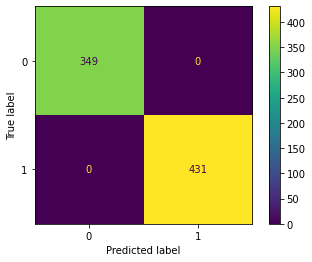

Accuracy without cross-validation: 100.0
Accuracy with 10-fold cross-validation: 80.38
F score: 0.819362455726092
Precision: 0.8341346153846154
Recall: 0.8051044083526682


In [151]:
accu_dt, prediction_dt, accu_cv_dt, f1_dt, precision_dt, recall_dt = run_ml_algo(DecisionTreeClassifier(), x_train, y_train, 10)

print("Accuracy without cross-validation: %s"  % accu_dt)
print("Accuracy with 10-fold cross-validation: %s" % accu_cv_dt)
print("F score: %s" % f1_dt)
print("Precision: %s" % precision_dt)
print("Recall: %s" % recall_dt)

### Random Forest

/Users/naman_bhatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


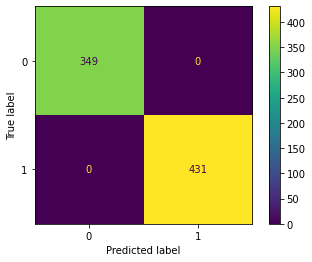

Accuracy without cross-validation: 100.0
Accuracy with 10-fold cross-validation: 86.92
F score: 0.884090909090909
Precision: 0.8663697104677061
Recall: 0.9025522041763341


In [152]:
accu_rf, prediction_rf, accu_cv_rf, f1_rf, precision_rf, recall_rf = run_ml_algo(RandomForestClassifier(), x_train, y_train, 10)

print("Accuracy without cross-validation: %s"  % accu_rf)
print("Accuracy with 10-fold cross-validation: %s" % accu_cv_rf)
print("F score: %s" % f1_rf)
print("Precision: %s" % precision_rf)
print("Recall: %s" % recall_rf)

### Gradient Boost

/Users/naman_bhatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


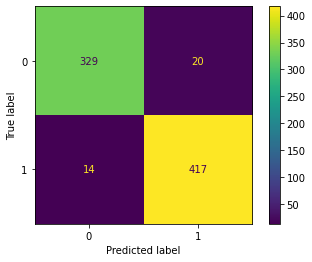

Accuracy without cross-validation: 95.64
Accuracy with 10-fold cross-validation: 86.28
F score: 0.8782707622298066
Precision: 0.8616071428571429
Recall: 0.8955916473317865


In [153]:
accu_gb, prediction_gb, accu_cv_gb, f1_gb, precision_gb, recall_gb = run_ml_algo(GradientBoostingClassifier(), x_train, y_train, 10)

print("Accuracy without cross-validation: %s"  % accu_gb)
print("Accuracy with 10-fold cross-validation: %s" % accu_cv_gb)
print("F score: %s" % f1_gb)
print("Precision: %s" % precision_gb)
print("Recall: %s" % recall_gb)

### AdaBoost

/Users/naman_bhatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


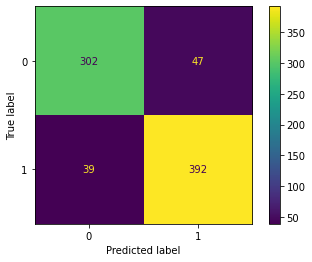

Accuracy without cross-validation: 88.97
Accuracy with 10-fold cross-validation: 85.77
F score: 0.8716763005780346
Precision: 0.868663594470046
Recall: 0.8747099767981439


In [154]:
accu_ab, prediction_ab, accu_cv_ab, f1_ab, precision_ab, recall_ab = run_ml_algo(AdaBoostClassifier(), x_train, y_train, 10)

print("Accuracy without cross-validation: %s"  % accu_ab)
print("Accuracy with 10-fold cross-validation: %s" % accu_cv_ab)
print("F score: %s" % f1_ab)
print("Precision: %s" % precision_ab)
print("Recall: %s" % recall_ab)

### XGBoost

/Users/naman_bhatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


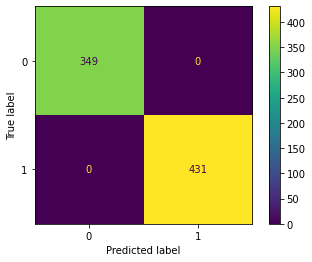

Accuracy without cross-validation: 100.0
Accuracy with 10-fold cross-validation: 86.03
F score: 0.8757126567844926
Precision: 0.8609865470852018
Recall: 0.8909512761020881


In [155]:
accu_xg, prediction_xg, accu_cv_xg, f1_xg, precision_xg, recall_xg = run_ml_algo(XGBClassifier(), x_train, y_train, 10)

print("Accuracy without cross-validation: %s"  % accu_xg)
print("Accuracy with 10-fold cross-validation: %s" % accu_cv_xg)
print("F score: %s" % f1_xg)
print("Precision: %s" % precision_xg)
print("Recall: %s" % recall_xg)

## Model Results

#### Compare scores of all the models

In [159]:
models = pd.DataFrame({
    'Model': ['Logistic Regression',
              'Stochastic Gradient Decent',
              'Gaussian Naive Bayes', 
              'Support Vector Classifier',
              'KNN',
              'Decision Tree Classifier', 
              'Random Forest',
              'Gradient Boost',
              'AdaBoost',
              'XGBoost'],
    'Regular Accuracy Score': [
        accu_log, 
        accu_sgd,  
        accu_nb, 
        accu_svc, 
        accu_knn, 
        accu_dt,
        accu_rf,
        accu_gb,
        accu_ab,
        accu_xg],
    'CV Accuracy Score': [
        accu_cv_log, 
        accu_cv_sgd,  
        accu_cv_nb, 
        accu_cv_svc, 
        accu_cv_knn, 
        accu_cv_dt,
        accu_cv_rf,
        accu_cv_gb,
        accu_cv_ab,
        accu_cv_xg],
    'F Score': [
        f1_log, 
        f1_sgd,  
        f1_nb, 
        f1_svc, 
        f1_knn, 
        f1_dt,
        f1_rf,
        f1_gb,
        f1_ab,
        f1_xg
]})
models.sort_values(by='CV Accuracy Score', ascending=False)

,Model,Regular Accuracy Score,CV Accuracy Score,F Score
3,Support Vector Classifier,91.03,87.05,0.885617
4,KNN,89.62,87.05,0.883774
6,Random Forest,100.00,86.92,0.884091
7,Gradient Boost,95.64,86.28,0.878271
2,Gaussian Naive Bayes,86.67,86.03,0.873108
9,XGBoost,100.00,86.03,0.875713
8,AdaBoost,88.97,85.77,0.871676
0,Logistic Regression,86.79,85.51,0.870561
1,Stochastic Gradient Decent,83.21,82.05,0.840183
5,Decision Tree Classifier,100.00,80.38,0.819362


#### The accuracy can be improved by tuning hyperparameters.